<a href="https://colab.research.google.com/github/nhrishi/1.1.0-experimental_bin/blob/master/TradingIntel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import json as json

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

#pip install fyers_apiv3

In [38]:
pip install fyers_apiv3

In [91]:
from fyers_apiv3 import fyersModel

client_id = "Q9Y3IP8H5W-100"
#access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTYzOTUzMzcsImV4cCI6MTcxNjQyNDI1NywibmJmIjoxNzE2Mzk1MzM3LCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVRoMUo5UzE1ZmxOaWJkdU5hNHI3bmNXNENic2Q1OUpCQVdJNHVDMkNGRVp6ZzBJNmxlRHdWT0dvRHRwTVlpRkFlU1h3UFBmLTBLeEl1UUQ5RGVTN0ZzM0F5S19ic2lDWlhYc2lHTEV3UWRmQUw0ND0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOm51bGwsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.xKhc8ITo4gcFm-wR18GskF2rhfrCXuj4IcM38ZpWi4Y"
access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTY0ODI3NjUsImV4cCI6MTcxNjUxMDYwNSwibmJmIjoxNzE2NDgyNzY1LCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVQzTE5ydkZlZUN2bVBPc1dIOFc3VmdPVHVsZFE0cTVzNVkwTkZwdlJBOW1pVWpxaE1TRTJrdXVtWUd1ZFNzVmZ1UlBkdW1TZnFqSk5hdEFFR0FVdDR3SGZJb2pka3BvN1VWLTJob2w5bnEzTzktVT0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOm51bGwsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.SdE2jvKJzWzBBL3Syd5dOb3OOTCdfX200YCOYpDQ7mg"
# Initialize the FyersModel instance with your client_id, access_token, and enable async mode
fyers = fyersModel.FyersModel(client_id=client_id, is_async=False, token=access_token, log_path="")

#yyyy-mm-dd
#Daily data Extraction
daily_data = {
    "symbol":"NSE:SBIN-EQ",
    "resolution":"D",
    "date_format":"1",
    "range_from":"2024-01-01",
    "range_to":"2024-05-22",
    "cont_flag":"1"
}

response = fyers.history(data=daily_data)
daily_data_json = json.dumps(response)
daily_data_df = json.loads(daily_data_json)
print(daily_data_df['candles'])
pricing_daily_data = daily_data_df['candles']
daily_df = pd.DataFrame(pricing_daily_data)
daily_df.columns = ["epoch", "open", "high", "low", "close", "volume"]


#hourly data Extraction
hourly_data = {
    "symbol":"NSE:SBIN-EQ",
    "resolution":"60",
    "date_format":"1",
    "range_from":"2024-03-01",
    "range_to":"2024-05-22",
    "cont_flag":"1"
}

response = fyers.history(data=hourly_data)
hourly_data_json = json.dumps(response)
hourly_data_df = json.loads(hourly_data_json)
print(hourly_data_df['candles'])
pricing_hourly_data = hourly_data_df['candles']
hourly_df = pd.DataFrame(pricing_hourly_data)
hourly_df.columns = ["epoch", "open", "high", "low", "close", "volume"]


import datetime
daily_df['date'] = pd.to_datetime(daily_df['epoch'], unit='s').dt.strftime('%Y-%m-%d')
print(daily_df)

hourly_df['date'] = pd.to_datetime(hourly_df['epoch'], unit='s').dt.strftime('%Y-%m-%d')
print(hourly_df)


[[1704067200, 642.2, 646.9, 638, 641.35, 8295548], [1704153600, 641.35, 648, 633.85, 639.45, 15164482], [1704240000, 639.35, 648, 635.8, 643.45, 14571772], [1704326400, 642.5, 646.4, 638.65, 642.75, 13883388], [1704412800, 645, 651.75, 637.75, 641.95, 15984585], [1704672000, 640, 645, 625.05, 627, 14739531], [1704758400, 632, 634.35, 624.5, 625.4, 13400235], [1704844800, 624.8, 625.3, 618.2, 621.75, 12742464], [1704931200, 626, 627.15, 618.5, 620.2, 15533860], [1705017600, 623.8, 636.5, 621.1, 633.6, 16620797], [1705276800, 638.9, 645.5, 636.1, 640.1, 16844018], [1705363200, 640, 644.9, 633.45, 636.9, 15025543], [1705449600, 624, 636.8, 623, 626, 30016308], [1705536000, 625.8, 633.45, 619.05, 628.3, 14695436], [1705622400, 633, 635.5, 624.7, 627.75, 11675202], [1705708800, 629, 633.8, 624.1, 631.4, 9886760], [1705968000, 627, 634.9, 600.65, 605.1, 30954343], [1706054400, 609.95, 622.35, 603.1, 618.3, 19221835], [1706140800, 618.5, 623.8, 606.25, 612.75, 22684904], [1706486400, 619, 629

In [40]:
#hourly_df.set_index('date', inplace=True)
#daily_df.set_index('date', inplace=True)

In [92]:
print(hourly_df)

          epoch    open    high     low   close   volume        date
0    1709264700  752.00  758.50  751.95  756.75  2592386  2024-03-01
1    1709268300  756.65  756.95  753.00  754.85  1372000  2024-03-01
2    1709271900  754.95  758.50  754.60  756.70  1803560  2024-03-01
3    1709275500  756.75  767.00  756.35  765.10  3622205  2024-03-01
4    1709279100  765.15  770.00  763.05  769.05  3113053  2024-03-01
..          ...     ...     ...     ...     ...      ...         ...
365  1716356700  816.25  818.90  813.55  818.55  1821566  2024-05-22
366  1716360300  818.55  820.00  815.75  816.55  1307472  2024-05-22
367  1716363900  816.65  819.45  815.10  817.45  2239015  2024-05-22
368  1716367500  817.35  819.70  815.50  819.10  3609775  2024-05-22
369  1716371100  819.10  820.40  818.40  818.75  1249165  2024-05-22

[370 rows x 7 columns]


In [93]:
# Moving Average 20
#daily_df['MA_20'] = daily_df['close'].rolling(window=20).mean()
#daily_df.dropna(inplace=True)
#print(daily_df)

####### Daily MACD calculations ######
# Calculate the 12-period EMA Daily
daily_df['DAILY_EMA12'] = daily_df['close'].ewm(span=12, adjust=False).mean()

# Calculate the 26-period EMA Daily
daily_df['DAILY_EMA26'] = daily_df['close'].ewm(span=26, adjust=False).mean()

# Calculate MACD (the difference between 12-period EMA and 26-period EMA)
daily_df['DAILY_MACD'] = daily_df['DAILY_EMA12'] - daily_df['DAILY_EMA26']

# Calculate the 9-period EMA of MACD (Signal Line)
daily_df['DAILY_SIGNAL'] = daily_df['DAILY_MACD'].ewm(span=9, adjust=False).mean()

####### Daily RSI calculations ######

delta = daily_df['close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
daily_df['DAILY_RSI'] = 100 - (100 / (1 + RS))


####### Hourly MACD calculations ######
# Calculate the 12-period EMA Daily
hourly_df['HOURLY_EMA12'] = hourly_df['close'].ewm(span=12, adjust=False).mean()

# Calculate the 26-period EMA Daily
hourly_df['HOURLY_EMA26'] = hourly_df['close'].ewm(span=26, adjust=False).mean()

# Calculate MACD (the difference between 12-period EMA and 26-period EMA)
hourly_df['HOURLY_MACD'] = hourly_df['HOURLY_EMA12'] - hourly_df['HOURLY_EMA26']

# Calculate the 9-period EMA of MACD (Signal Line)
hourly_df['HOURLY_SIGNAL'] = hourly_df['HOURLY_MACD'].ewm(span=9, adjust=False).mean()

####### Hourly RSI calculations ######

delta = hourly_df['close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
hourly_df['HOURLY_RSI'] = 100 - (100 / (1 + RS))


#### Drop rows with NaN values created by indicators calculation

daily_df.dropna(inplace=True)
hourly_df.dropna(inplace=True)

print(hourly_df)

          epoch    open    high     low   close   volume        date  \
13   1709534700  772.25  774.90  772.00  772.80  1090513  2024-03-04   
14   1709538300  772.85  774.30  772.50  773.95   874443  2024-03-04   
15   1709541900  773.95  774.45  769.50  772.05  2240291  2024-03-04   
16   1709545500  772.30  772.60  770.65  771.35   927915  2024-03-04   
17   1709610300  769.50  781.40  769.10  779.80  3265813  2024-03-05   
..          ...     ...     ...     ...     ...      ...         ...   
365  1716356700  816.25  818.90  813.55  818.55  1821566  2024-05-22   
366  1716360300  818.55  820.00  815.75  816.55  1307472  2024-05-22   
367  1716363900  816.65  819.45  815.10  817.45  2239015  2024-05-22   
368  1716367500  817.35  819.70  815.50  819.10  3609775  2024-05-22   
369  1716371100  819.10  820.40  818.40  818.75  1249165  2024-05-22   

     HOURLY_EMA12  HOURLY_EMA26  HOURLY_MACD  HOURLY_SIGNAL  HOURLY_RSI  
13     769.522210    765.188164     4.334046       3.564488  

In [94]:
## Aggregate hourly data into daily

# Define the aggregation functions for each feature
aggregation_functions = {
    'close': ['mean', 'max', 'min'],
    'volume': ['sum'],
    'HOURLY_RSI': ['mean', 'max', 'min'],
    'HOURLY_MACD': ['mean', 'max', 'min']
}

# Convert the 'date' column to a DatetimeIndex
hourly_df['date'] = pd.to_datetime(hourly_df['date'])

# Resample the hourly data to daily data
daily_aggregated = hourly_df.resample('D', on='date').agg(aggregation_functions)

# Flatten the column hierarchy
daily_aggregated.columns = ['_'.join(col).strip() for col in daily_aggregated.columns.values]
daily_aggregated.reset_index(inplace=True)

In [95]:
print(daily_aggregated)


         date  close_mean  close_max  close_min  volume_sum  HOURLY_RSI_mean  \
0  2024-03-04  772.537500     773.95     771.35     5133162        80.312478   
1  2024-03-05  782.828571     786.20     779.80    18084626        74.413335   
2  2024-03-06  784.507143     786.85     778.90    26705378        67.325834   
3  2024-03-07  787.914286     789.95     785.85    15493121        57.562602   
4  2024-03-08         NaN        NaN        NaN           0              NaN   
..        ...         ...        ...        ...         ...              ...   
75 2024-05-18  820.883333     821.50     820.40      958881        56.588576   
76 2024-05-19         NaN        NaN        NaN           0              NaN   
77 2024-05-20         NaN        NaN        NaN           0              NaN   
78 2024-05-21  831.885714     834.40     830.40    14030799        76.753328   
79 2024-05-22  818.157143     820.40     816.30    19231499        49.471327   

    HOURLY_RSI_max  HOURLY_RSI_min  HOU

In [96]:
# Merge the daily data with the aggregated hourly data
# Convert the 'date' column in daily_aggregated to datetime64[ns]
daily_df['date'] = pd.to_datetime(daily_df['date'])
daily_aggregated['date'] = pd.to_datetime(daily_aggregated['date'])

# Merge the daily data with the aggregated hourly data
combined_df = pd.merge(daily_df, daily_aggregated, left_on='date', right_on='date', how='inner')

# Drop the 'Datetime' column if it exists
if 'Datetime' in combined_df.columns:
    combined_df.drop(columns=['Datetime'], inplace=True)

# Print the combined DataFrame
print(combined_df)

         epoch    open    high     low   close    volume       date  \
0   1709510400  774.40  777.00  769.00  772.05   9789141 2024-03-04   
1   1709596800  769.50  786.95  769.10  783.95  18088847 2024-03-05   
2   1709683200  783.65  790.30  772.90  783.90  26710525 2024-03-06   
3   1709769600  790.00  793.40  783.00  788.05  15497868 2024-03-07   
4   1710115200  790.00  792.80  770.55  773.70  16778340 2024-03-11   
5   1710201600  770.00  777.75  757.35  759.70  21529705 2024-03-12   
6   1710288000  758.65  763.70  743.00  747.25  27950252 2024-03-13   
7   1710374400  749.90  750.80  734.05  741.05  19730882 2024-03-14   
8   1710460800  739.25  746.55  723.00  731.90  29792241 2024-03-15   
9   1710720000  727.10  737.90  722.10  730.95  18145126 2024-03-18   
10  1710806400  730.00  734.35  721.15  723.80  15205043 2024-03-19   
11  1710892800  725.15  738.95  719.80  736.25  25405455 2024-03-20   
12  1710979200  742.00  750.60  740.55  744.30  15161161 2024-03-21   
13  17

In [97]:
# Normalize features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(combined_df[['close', 'DAILY_MACD', 'DAILY_RSI', 'DAILY_SIGNAL', 'volume', 'HOURLY_MACD_mean', 'HOURLY_RSI_mean', 'volume_sum' ]])
print(scaled_data)

[[4.48211797e-01 9.86430269e-01 7.85438032e-01 1.00000000e+00
  1.82675861e-01 6.60582030e-01 9.05440905e-01 8.64108627e-02]
 [5.58755225e-01 1.00000000e+00 7.36145424e-01 9.91166041e-01
  3.54406467e-01 7.13787185e-01 8.23019265e-01 3.54516239e-01]
 [5.58290757e-01 9.97764912e-01 8.34358703e-01 9.83620415e-01
  5.32799049e-01 7.16235873e-01 7.23994115e-01 5.32972509e-01]
 [5.96841616e-01 9.96879519e-01 8.31243514e-01 9.77394380e-01
  3.00796086e-01 6.82237560e-01 5.87584209e-01 3.00870070e-01]
 [4.63539248e-01 9.36685966e-01 6.35235071e-01 9.59528076e-01
  3.27290547e-01 5.26014532e-01 3.42392301e-01 3.27412669e-01]
 [3.33488156e-01 8.31854115e-01 3.83477141e-01 9.22793955e-01
  4.25601835e-01 2.92773858e-01 4.00704846e-02 4.25795744e-01]
 [2.17835578e-01 6.98302408e-01 3.27608207e-01 8.64817594e-01
  5.58450448e-01 1.26185752e-01 0.00000000e+00 5.58679025e-01]
 [1.60241523e-01 5.64168544e-01 3.32615378e-01 7.89722822e-01
  3.88382087e-01 5.39935595e-02 2.32904778e-01 3.88571792e-01]


In [124]:
# Create sequences for LSTM model
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length, 0])  # Assuming 'Close' is the first column
    return np.array(sequences), np.array(labels)


# If the input data is not a 2D array, reshape it
if len(scaled_data.shape) != 2:
    scaled_data = scaled_data.reshape(-1, 1)

SEQ_LENGTH = 40  # 60 days sequence
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [149]:
print(len(scaled_data))
print(scaled_data.shape)
print(len(combined_df))
print(X_train.shape)
print(len(X_train.shape))
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

52
(52, 8)
52
(9, 40, 8)
3
(9,)
(3, 40, 8)
(3,)


In [150]:
if len(X_train.shape) == 3:
    X_train = np.expand_dims(X_train, axis=2)

In [151]:
print(X_train.shape)

(9, 40, 1, 8)


In [152]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_6' (type Sequential).
    
    Input 0 of layer "lstm_12" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 40, 1, 8)
    
    Call arguments received by layer 'sequential_6' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 40, 1, 8), dtype=float32)
      • training=True
      • mask=None


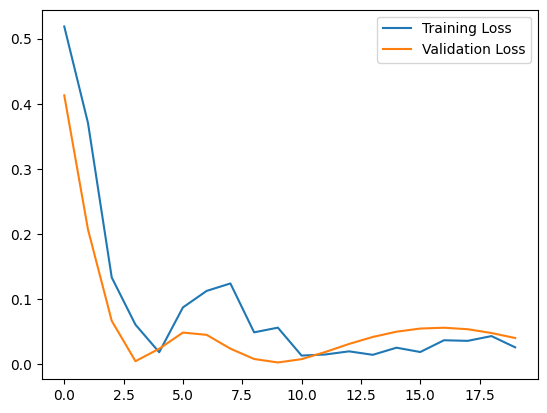

1/1 [==============================] - 0s 53ms/step


ValueError: operands could not be broadcast together with shapes (3,2) (8,) (3,2) 

In [146]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


# Make predictions
predicted_prices = model.predict(X_test)
#If the input data is not a 2D array, reshape it
#if len(predicted_prices.shape) != 2:
#   predicted_prices = predicted_prices.reshape(-1, 1)
predicted_prices = scaler.inverse_transform(np.concatenate([predicted_prices, np.zeros((predicted_prices.shape[0], 1))], axis=1))[:, 0]
#predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))[:, 0]
# predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, X_train.shape[2]))[:, 0]


#predicted_prices = scaler.inverse_transform(np.concatenate([predicted_prices.reshape(-1, 1), np.zeros((predicted_prices.shape[0], 1))], axis=1))[:, 0]
#predicted_prices = scaler.inverse_transform(np.concatenate([predicted_prices.reshape(-1, 1), np.zeros_like(predicted_prices[:, 0])], axis=1))[:, 0]
#predicted_prices = scaler.inverse_transform(np.concatenate([predicted_prices.reshape(-1, 1), np.zeros_like(predicted_prices[:, 0]).reshape(-1, 1)], axis=1))[:, 0]
#predicted_prices = scaler.inverse_transform(np.concatenate([predicted_prices.reshape(-1, 1), np.zeros_like(predicted_prices[:, 0]).reshape(-1, 1)], axis=1))[:, 0]
# Plot predicted vs actual prices
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))], axis=1))[:, 0], label='Actual Price')
plt.plot(df.index[-len(y_test):], predicted_prices, label='Predicted Price')
plt.legend()
plt.show()


In [140]:
print(predicted_prices.shape)
print(predicted_prices)

# If the input data is not a 2D array, reshape it
#if len(predicted_prices.shape) != 2:
#    predicted_prices = predicted_prices.reshape(-1, 1)
#print(predicted_prices.shape)


(3, 1)
[[0.72724736]
 [0.723206  ]
 [0.7231429 ]]
